In [2]:
# Import API for access to openprescribe.net data
import api
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
help(api.get_merged_dataframe)

Help on function get_merged_dataframe in module api:

get_merged_dataframe(org, code)



In [3]:
df = api.get_merged_dataframe('14L', '5.1')

In [13]:
heatmap_df = df.copy()
heatmap_df['year'] = [d.year for d in df['date']]
heatmap_df['month'] = [d.month for d in df['date']]
year = 2016
heatmap_df = heatmap_df[heatmap_df.year == year]
heatmap_df['items_per_patient'] = heatmap_df['items'] / heatmap_df['total_list_size']
heatmap_df.describe()


,setting,actual_cost,items,quantity,total_list_size,items_per_patient,year,month
count,1092.0,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.0,1092.000000
mean,4.0,1605.144103,312.608059,14113.048535,6700.447802,0.047737,2016.0,6.500000
std,0.0,1041.598991,185.709619,8607.884318,3470.014939,0.018401,0.0,3.453634
min,4.0,16.440000,4.000000,460.000000,1247.000000,0.000950,2016.0,1.000000
25%,4.0,860.640000,174.750000,7792.750000,4189.750000,0.034354,2016.0,3.750000
50%,4.0,1371.975000,284.000000,12580.500000,6432.500000,0.044759,2016.0,6.500000
75%,4.0,2097.422500,399.000000,17791.000000,8446.750000,0.057500,2016.0,9.250000
max,4.0,6511.420000,1100.000000,48982.000000,20524.000000,0.132515,2016.0,12.000000


In [14]:
heatmap_df = heatmap_df.pivot(index = "row_name", columns='month', values='items_per_patient')

[Text(68.99999999999999, 0.5, 'Practice'), Text(0.5, 249.0, 'Month')]

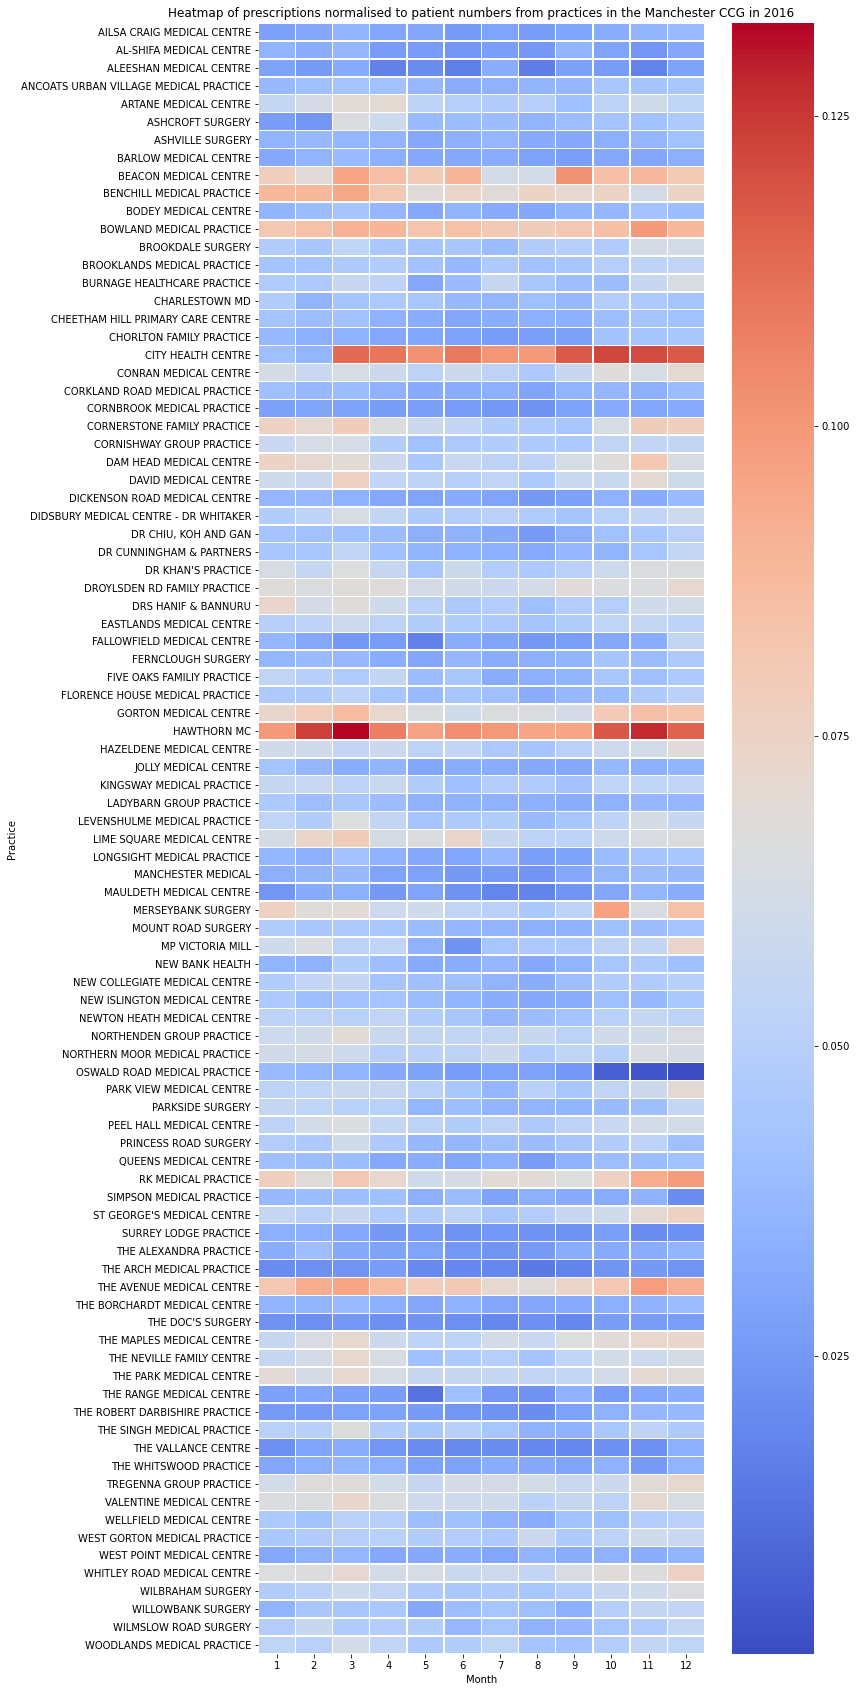

In [15]:
fig, ax = plt.subplots(figsize=(10,30))  
plot = sns.heatmap(heatmap_df, cmap="coolwarm", ax=ax, linewidths=.5)
ax.set_title(f"Heatmap of prescriptions normalised to patient numbers from practices in the Manchester CCG in {year}")
ax.set(ylabel = "Practice", xlabel = "Month")

In [25]:
df['items'].mean()

309.42928452579037

In [20]:
plot.figure.savefig('fig.png')
print("done")

done
